

# Project: Investigate a Dataset (Gapminder Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> As life goes on we need to keep track the changes in health, education, diseases, life level of individuals and alot of other indicators to see how does industry revolution and other things affect individuals life and environment.

> So Gapminder provide us with alot of indicators which if connected together will give a detailed information and analysis of different indicators as mentioned above.

> In this dataset we will take a look on some indicators like education and health as will as some serious problem like suicide which tend to be very important specially nowadays.

> **The data as csv files**:

>Income_per_person : Which descripe GDP per each person in a specific country.

>Health : Which is the spending amount on health as a percent of GDP of a specific country

>Life_Expectancy: which descripe the average years a new born children would live.

>Suicide_per_100000 : The number of people commit suicide in specific country.

>Literacy level : which descripe number of adult people who can write and read.


First of all our mudules that we will work with are as next

In [140]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [104]:
df_income = pd.read_csv('income_per_person.csv')
df_health = pd.read_csv('total_health_spending_percent_of_gdp.csv')
df_suicide = pd.read_csv('suicide_per_100000_people.csv')
df_life = pd.read_csv('life_expectancy_years.csv')
df_literacy_rate = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')

In [105]:
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


As we saw above our Dataset need some editing to be in shape that allow us to continue our analysis.
We will use melt fuction from Pandas module.

### Preparing the data

we need to prepare our data to be in a shape suited for us to analyse so the following operations will do the job.

In [142]:
df_income_up = pd.melt(df_income,
                     ['country'],
                     var_name = 'year', 
                     value_name = 'gdp_per_person').sort_values(by = ['country', 'year']).reset_index(drop = True)


Here is a sample of the data set in the shape we need which allow to continue invistigation

In [143]:
df_income_up.head()

,country,year,gdp_per_person
0,Afghanistan,1800,683
1,Afghanistan,1801,683
2,Afghanistan,1802,683
3,Afghanistan,1803,683
4,Afghanistan,1804,683


In [144]:
df_health_up = pd.melt(df_health,
                     ['country'],
                     var_name = 'year', 
                     value_name = 'health').sort_values(by = ['country', 'year']).reset_index(drop = True)


In [145]:
df_life_up = pd.melt(df_life,
                     ['country'],
                     var_name = 'year', 
                     value_name = 'life_expectancy').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [146]:
df_suicide_up = pd.melt(df_suicide,
                     ['country'],
                     var_name = 'year', 
                     value_name = 'suicide_per_100000').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [147]:
df_literacy_up = pd.melt(df_literacy_rate,
                     ['country'],
                     var_name = 'year', 
                     value_name = 'adults_literacy_rate').sort_values(by = ['country', 'year']).reset_index(drop = True)

By now we gave all the data frames the shape and structure we need.

In the next step we will merge all the dataframes based on the common countries for common years in all of them so we can analys and compare between different indicators

In [148]:
list_of_dfs=[df_income_up , df_health_up , df_suicide_up , df_life_up , df_literacy_up]
i=0
for df in list_of_dfs:
    if i == 0:
        gap_minder = df 
    else :
        gap_minder = pd.merge(gap_minder , df , how = 'inner' , on = ['country' , 'year'])
    i+=1

gap_minder = gap_minder.sort_values(by = ['country', 'year']).reset_index(drop = True)
gap_minder.head()

,country,year,gdp_per_person,health,suicide_per_100000,life_expectancy,adults_literacy_rate
0,Albania,1995,4470,2.56,2.90,74.6,NaN
1,Albania,1996,4910,4.04,2.96,74.5,NaN
2,Albania,1997,4400,4.81,5.48,72.9,NaN
3,Albania,1998,4820,5.34,4.95,74.8,NaN
4,Albania,1999,5480,5.83,4.47,75.1,NaN




>Let's see some information about the data including number of rows, columns and null values 

In [149]:
gap_minder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               1184 non-null   object 
 1   year                  1184 non-null   object 
 2   gdp_per_person        1184 non-null   object 
 3   health                1182 non-null   float64
 4   suicide_per_100000    482 non-null    float64
 5   life_expectancy       1184 non-null   float64
 6   adults_literacy_rate  164 non-null    float64
dtypes: float64(4), object(3)
memory usage: 64.9+ KB



>What about some statictics of the data.

In [114]:
gap_minder.describe()

,health,suicide_per_100000,life_expectancy,adults_literacy_rate
count,1182.000000,482.000000,1184.000000,164.000000
mean,6.190753,11.731967,72.546791,91.464024
std,2.000977,9.609592,4.707221,7.554237
min,1.810000,0.045400,52.100000,55.600000
25%,4.660000,4.737500,70.100000,88.675000
50%,6.110000,8.805000,73.000000,92.750000
75%,7.670000,15.900000,75.525000,97.725000
max,12.500000,44.300000,82.800000,99.800000


In [150]:
gap_minder.duplicated().sum()

0

In [151]:
gap_minder.isnull().any()

country                 False
year                    False
gdp_per_person          False
health                   True
suicide_per_100000       True
life_expectancy         False
adults_literacy_rate     True
dtype: bool

In [152]:
gap_minder.isnull().sum()

country                    0
year                       0
gdp_per_person             0
health                     2
suicide_per_100000       702
life_expectancy            0
adults_literacy_rate    1020
dtype: int64

Below we will go some steps to clean and organize data to make it ready to analys.


In [153]:
gap_minder['year'] = pd.to_datetime(gap_minder['year'] , format = '%Y')

In [160]:
gap_minder['country'].nunique()

74

We see from above that we have 74 unique country in our dataset, let's see unique countries.

In [161]:
gap_minder['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahrain', 'Belarus', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Georgia', 'Greece', 'Guatemala', 'Guyana', 'Hungary', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait',
       'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro',
       'Nicaragua', 'North Macedonia', 'Oman', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Singapore',
       'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname',
       'Tajikistan', 'Thailand', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay', 'U

In [165]:
gap_minder.gdp_per_person.apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
1179    <class 'str'>
1180    <class 'str'>
1181    <class 'str'>
1182    <class 'str'>
1183    <class 'str'>
Name: gdp_per_person, Length: 1184, dtype: object

In [166]:
gap_minder.gdp_per_person

0        4470
1        4910
2        4400
3        4820
4        5480
        ...  
1179    18.9k
1180    20.2k
1181    20.9k
1182      20k
1183    19.9k
Name: gdp_per_person, Length: 1184, dtype: object

### As we saw gdp column need some cleaning and preparing which are :

- first we need to extract float values from string that contain different currency formating like ( 20k , 18.9 k ... etc)
- secondly we need to convert all data types to be float values so we can do mathematical operations on them.

In [167]:
gap_minder['gdp_per_person'] = (gap_minder['gdp_per_person'].replace(r'[k]', '', regex=True).astype(float) * \
   ....:         gap_minder['gdp_per_person'].str.extract(r'[\d\.]+([k])', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['k'], [10**3]).astype(int))


Now let's take a look on highest gdp country and lowest gdp country 

In [169]:
max_gdp = gap_minder['gdp_per_person'].max()
max_country_gdp = gap_minder.loc[gap_minder['gdp_per_person'] == max_gdp]
max_country_gdp

,country,year,gdp_per_person,health,suicide_per_100000,life_expectancy,adults_literacy_rate
847,Qatar,2010-01-01,95900.0,1.81,NaN,73.4,96.3


In [171]:
min_gdp = gap_minder['gdp_per_person'].min()
min_country_gdp=gap_minder.loc[gap_minder['gdp_per_person'] == min_gdp]
min_country_gdp

,country,year,gdp_per_person,health,suicide_per_100000,life_expectancy,adults_literacy_rate
1025,Tajikistan,1996-01-01,1170.0,3.11,4.47,64.1,NaN
1026,Tajikistan,1997-01-01,1170.0,3.64,4.01,65.6,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### First: let's see Indicators values variation in different countries

Here is a bar plot describe how GDP difference affect life expectancy of individuals.

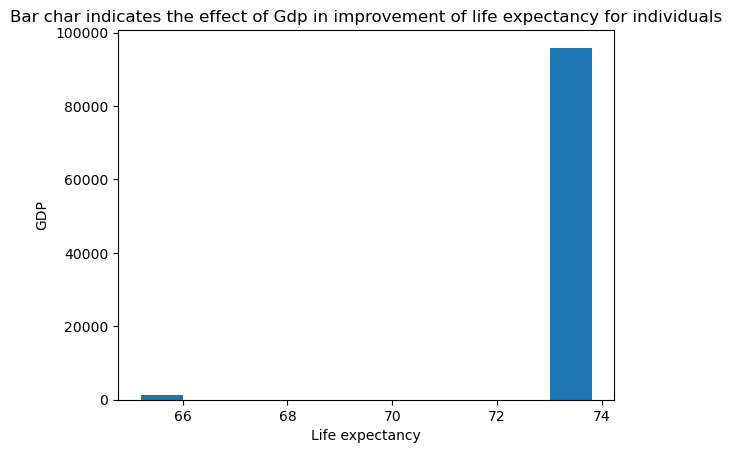

In [173]:
x_axis = [min_country_gdp['life_expectancy'].iloc[1], max_country_gdp['life_expectancy']]
y_axis = [min_country_gdp['gdp_per_person'].iloc[1], max_country_gdp['gdp_per_person']]

plt.bar(x_axis, y_axis)
plt.title('Bar char indicates the effect of Gdp in improvement of life expectancy for individuals')
plt.xlabel('Life expectancy')
plt.ylabel('GDP')
plt.show()



>**In the next cell is the data grouped for each country so we can compare between different countries on some indicators.**

In [175]:
gdp_grouped = gap_minder.groupby('country').mean()
gdp_grouped

,gdp_per_person,health,suicide_per_100000,life_expectancy,adults_literacy_rate
country,,,,,
Albania,7160.000,5.932500,4.037692,75.93125,97.300000
Antigua and Barbuda,18700.000,4.725000,NaN,75.02500,99.000000
Argentina,19425.000,8.598125,6.465000,74.59375,97.200000
Armenia,6086.250,5.243750,2.034000,72.44375,99.400000
Azerbaijan,6793.125,5.710000,0.948429,67.03125,99.400000
...,...,...,...,...,...
Turkmenistan,5436.250,3.333125,8.280000,66.23750,98.800000
Ukraine,9730.000,6.490625,24.030000,68.32500,99.400000
Uruguay,14956.250,8.605625,NaN,75.09375,97.850000




>Below is a bar plot showing how different the gdp is for a range of countries.

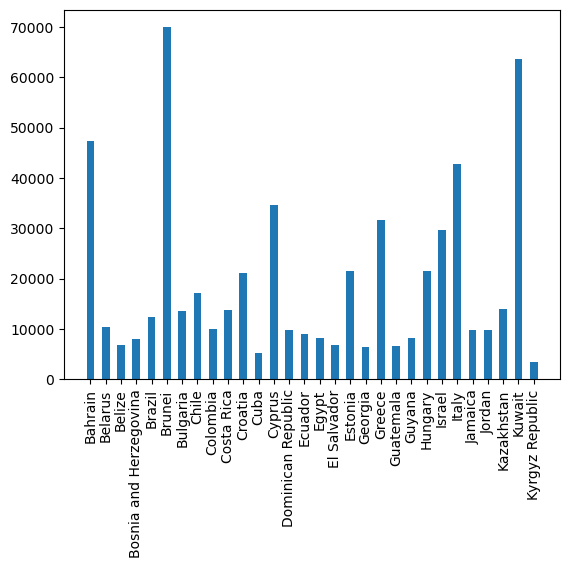

In [176]:
random_sample = gdp_grouped.iloc[5:35]   # here is a sample of the grouped data by country to use for drawing the graph
bars_heights = random_sample.gdp_per_person
bars_label = random_sample.index

plt.bar(range(len(bars_label)), bars_heights , width = 0.5)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()



>The next cell we make a bar plot showing the spending percent on health for a range of countries.

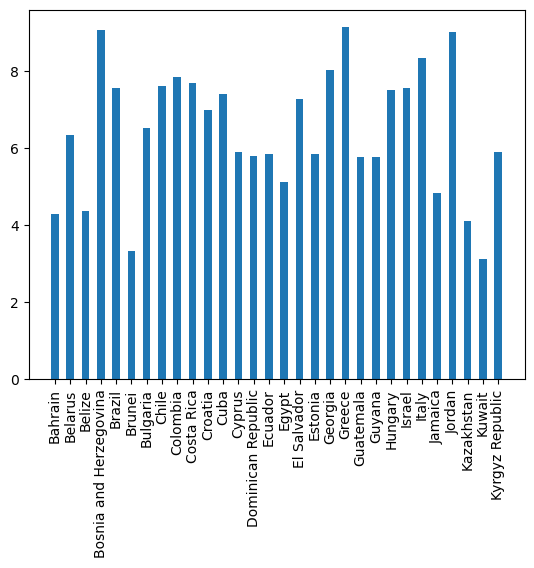

In [177]:
random_sample = gdp_grouped.iloc[5:35]    # here is a sample of the grouped data by country to use for drawing the graph
bars_heights = random_sample.health
bars_label = random_sample.index

plt.bar(range(len(bars_label)), bars_heights , width = 0.5)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()



>Below is a cell showing suicide per 100000 for a range of countries.

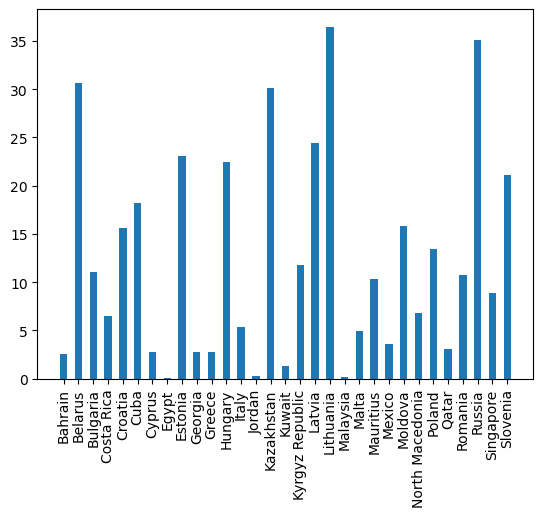

In [178]:
random_sample = gdp_grouped.iloc[5:60].dropna()  # here is a sample of the grouped data by country to use for drawing the graph
bars_heights = random_sample.suicide_per_100000
bars_label = random_sample.index

plt.bar(range(len(bars_label)), bars_heights , width = 0.5)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()



>Next cell showing life expectancy for new porn childs in a range of countries.

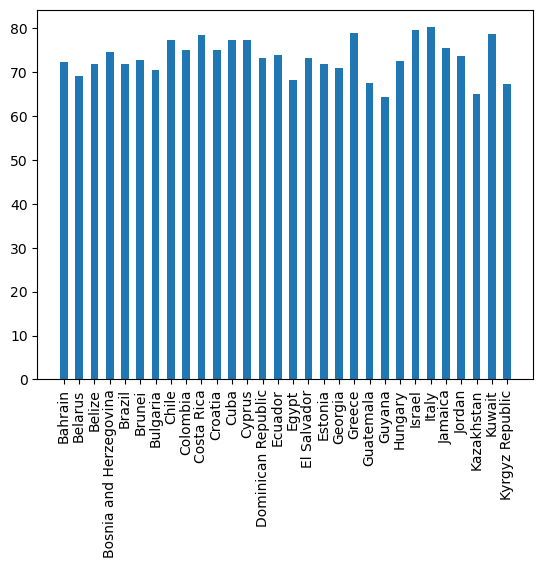

In [179]:
random_sample = gdp_grouped.iloc[5:35] # here is a sample of the grouped data by country to use for drawing the graph
bars_heights = random_sample.life_expectancy
bars_label = random_sample.index

plt.bar(range(len(bars_label)), bars_heights , width = 0.5)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()



>the next cell is a bar plot for literacy rate to a range of countries

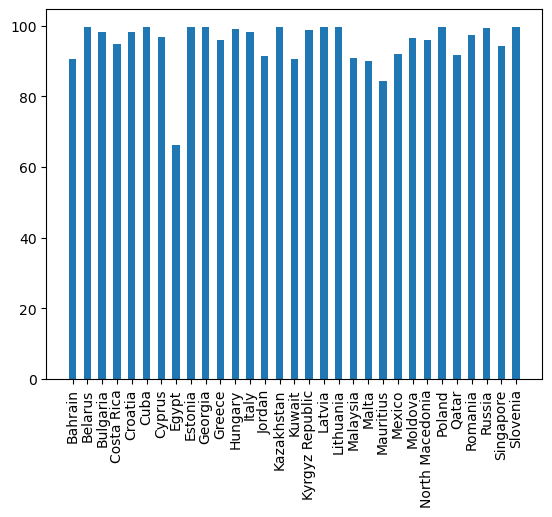

In [180]:
random_sample = gdp_grouped.iloc[5:60].dropna()  # here is a sample of the grouped data by country to use for drawing the graph
bars_heights = random_sample.adults_literacy_rate
bars_label = random_sample.index

plt.bar(range(len(bars_label)), bars_heights , width = 0.5)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

> **Now let's do it in a different way** :
We will see the evolution of all indicators through time.
Note that the gdp is raising over years and it's effect on other indicators.

### secondly : GDP per capita and it's effect on other idicators

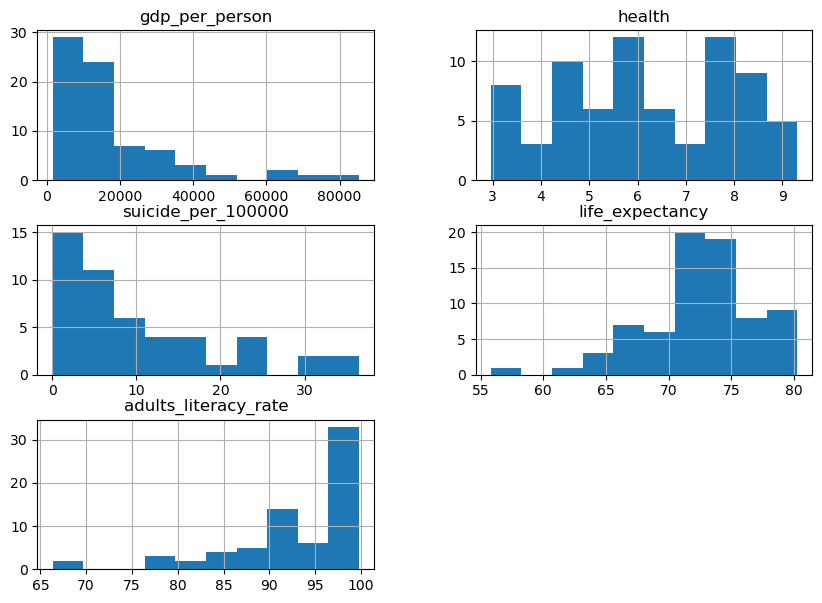

In [181]:
grouped_by_country = gap_minder.groupby('country').mean()
sorted_gdp = grouped_by_country.sort_values('gdp_per_person')
grouped_by_country.hist(figsize = (10 , 7));

The group of histograms above shows the maximun and minimum and othe valus for different indicators in defferent countries


>**Let's see the effect of GDP on different indicators.**

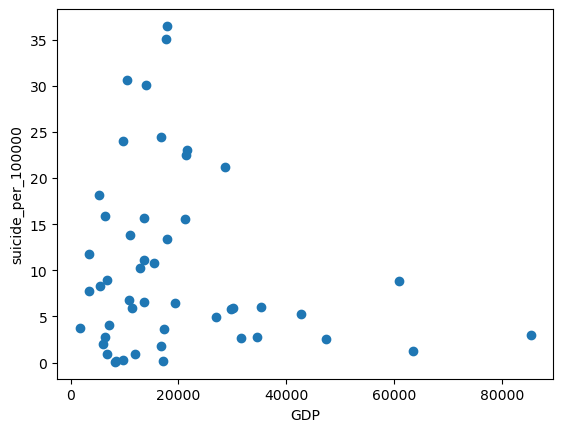

In [183]:

plt.scatter( x = sorted_gdp['gdp_per_person'] ,  y=sorted_gdp['suicide_per_100000'])
plt.xlabel('GDP')
plt.ylabel('suicide_per_100000')
plt.show()

In this cell we found that thre is alot of valus in low gdp regions and this is reduced as the gdp increase

Next the effect of GDP on life expectancy for new born childs in different countries

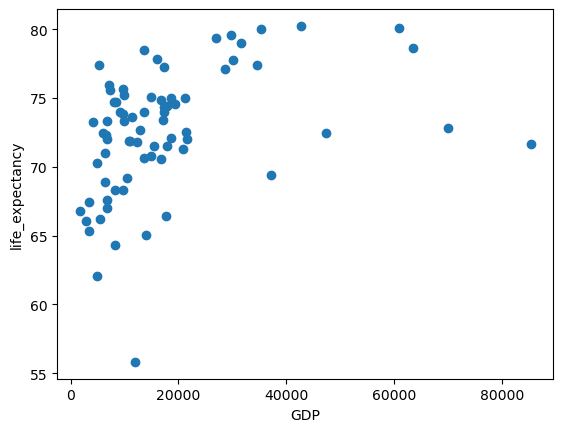

In [184]:

plt.scatter( x = sorted_gdp['gdp_per_person'] ,  y=sorted_gdp['life_expectancy'])
plt.xlabel('GDP')
plt.ylabel('life_expectancy')
plt.show()

we saw that alot of new babies have low life expectancy if individuals have low gdp but it's improved with high gdp

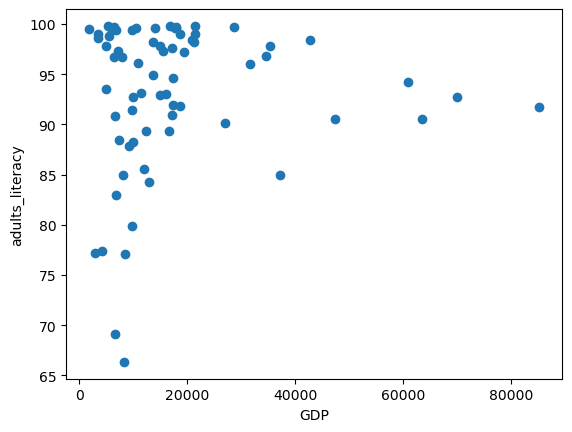

In [185]:

plt.scatter( x = sorted_gdp['gdp_per_person'] ,  y=sorted_gdp['adults_literacy_rate'])
plt.xlabel('GDP')
plt.ylabel('adults_literacy')
plt.show()

AS shown in the above cell low gdp results to low literacy rate for adults but as the gdp improve that means alot of suggestions and plans to improve adults education.

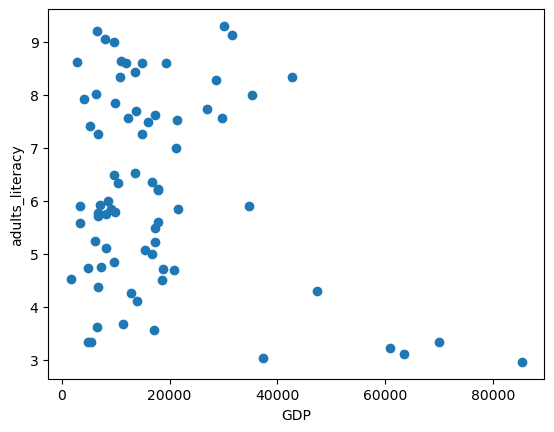

In [186]:

plt.scatter( x = sorted_gdp['gdp_per_person'] ,  y=sorted_gdp['health'])
plt.xlabel('GDP')
plt.ylabel('adults_literacy')
plt.show()

So it may be foggy to notice that high gdp coutries have a low health percent idicators nut it's true cuz health indicators as mentioned before is the percent of gdp a person will spent on health caring cuz high gdp countries will have a good environment in all indicators which in turn reflects on individuals health and reduce what they spent to fight diseaces.

Lastly let's see How life is improving over the years in the indicators we are working with.

### Thirdly : Improving of life in different indicators through passing of years

In [187]:
data_grouped = gap_minder.groupby('year').mean()
data_grouped.adults_literacy_rate.fillna(value = data_grouped.adults_literacy_rate.min() , inplace = True)

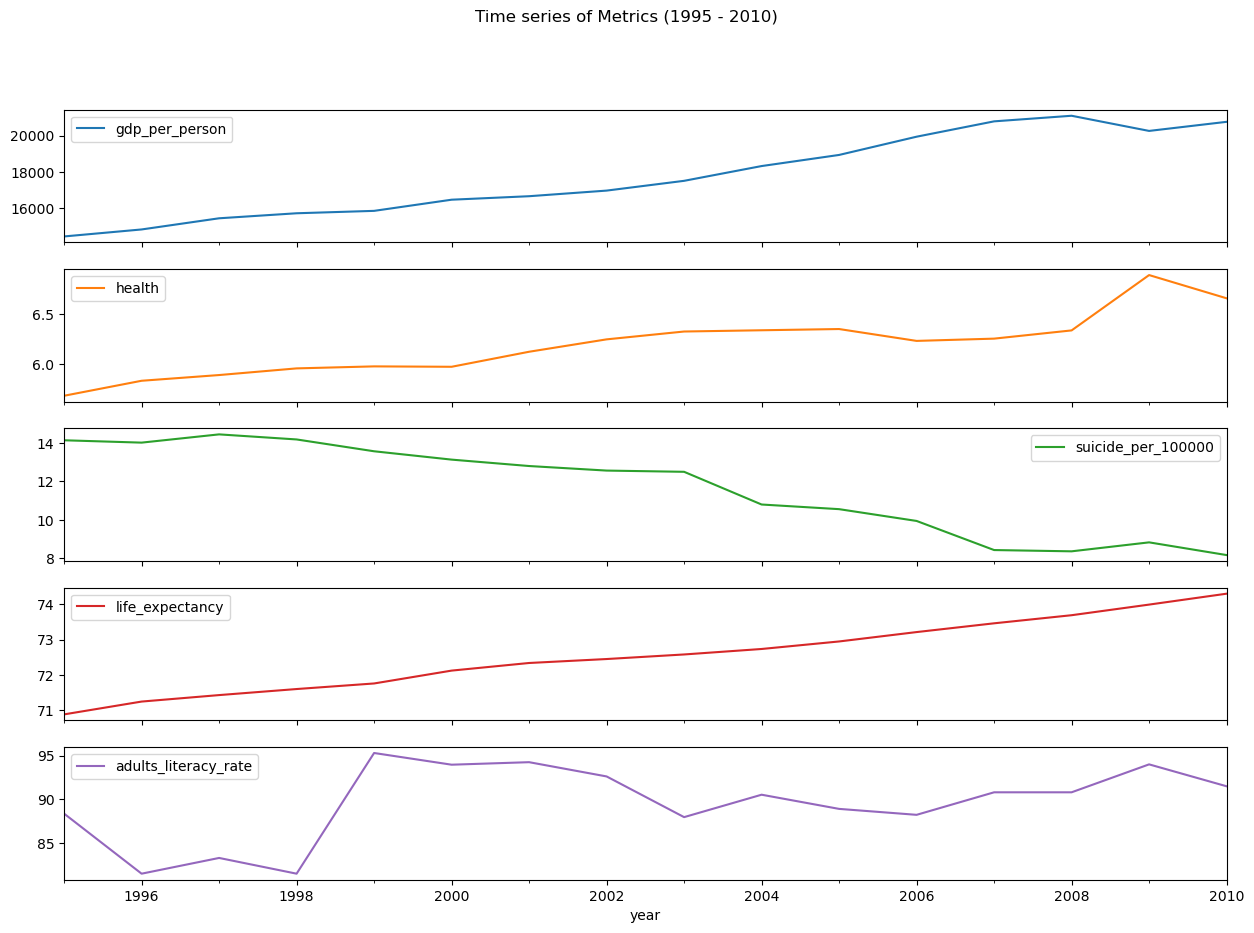

In [188]:
data_grouped.plot(figsize = (15,10),subplots = True, title = 'Time series of Metrics (1995 - 2010)');


<a id='conclusions'></a>
## Conclusions 
### from the First question we can ensure that:
#### - Not all countries have high gdp some countries still need to raise their gdp.
#### - from the analysis of Adults literacy rate you can decide which country you would travel for education.
#### - there are some countries with high suicide rate which is a serious problem need to be focused on.
### from the second question we can ensure that:
#### - High gdp means good education, good health  and improving individuals life.
#### - as we saw in suicide plot it's really obivious that gdp play a vital rule in suicide values .
#### - in the analysis of literacy rate for adults we say that high gdp means average or high literacy rate but not low cuz high gdp help in suggestions of plans and tools to educate adults.
### from the third question we can notic that :
#### although there are seriuos problems like suicide rates and literacy of adults but there is still an improvement in all indicators through years which mean there are some efforts countries exert to improve peoples life.